# Regression with Neural Networks

A taxi company faces customer complaints about unpredictable fares. To solve this, you plan a mobile app that estimates ride costs in real time. Using historical New York City taxi-fare data, you will train a neural network to predict fares based on factors like time of day, pickup and drop-off locations, and trip details.


## Load and prepare data

Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset containing more than 100 million rows. Recently, the larger dataset was used in Kaggle's [New York City Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) competition.

In [1]:
import pandas as pd

df = pd.read_csv('Data/taxi-fares.csv', parse_dates=['pickup_datetime'])
df.head()

key  fare_amount           pickup_datetime  \
0  2014-06-15 17:11:00.000000107          7.0 2014-06-15 17:11:00+00:00   
1   2011-03-14 22:43:00.00000095          4.9 2011-03-14 22:43:00+00:00   
2   2011-02-14 15:14:00.00000067          6.1 2011-02-14 15:14:00+00:00   
3   2009-10-29 11:29:00.00000040          6.9 2009-10-29 11:29:00+00:00   
4   2011-07-02 10:38:00.00000028         10.5 2011-07-02 10:38:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.995420        40.759662         -73.987607         40.751247   
1        -73.993552        40.731110         -73.998497         40.737200   
2        -73.972380        40.749527         -73.990638         40.745328   
3        -73.973703        40.763542         -73.984253         40.758603   
4        -73.921262        40.743615         -73.967383         40.765162   

   passenger_count  
0                1  
1                5  
2                1  
3                5  
4                1

The data requires a fair amount of prep work before it’s useful — something that is not uncommon in machine learning. Use the following statements to transform the raw dataset into one suitable for training.

In [2]:
from math import sqrt
 
df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)
 
for i, row in df.iterrows():
    dt = row['pickup_datetime']
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
 
df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
         'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)
 
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.head()

fare_amount  day_of_week  pickup_time  distance
2          6.1          0.0         15.0  1.038136
4         10.5          5.0         10.0  2.924341
5         15.3          4.0         20.0  4.862893
8          7.7          5.0          1.0  2.603493
9          8.9          3.0         16.0  1.365739

The resulting dataset contains columns for the day of the week (0-6, where 0 corresponds to Monday), the hour of day (0-23), and the distance traveled in miles, and from which outliers have been removed.

# Train a neural network

Now it's time build a neural network and train it with the data prepared in the previous exercise. We'll create two hidden layers with 512 neurons each and an input layer that accepts three values: distance, the day of the week, and the time of day. Since the model is designed to predict a fare amount, the output layer will have one neuron.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 265,217
Trainable params: 265,217
Non-trainable params: 0
_________________________________________________________________


Extract the feature columns and the label column and train the model.

In [4]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

hist = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
187/187 [==============================] - 1s 3ms/step - loss: 2.8597 - mae: 2.8597 - val_loss: 2.5236 - val_mae: 2.5236
Epoch 2/100
187/187 [==============================] - 0s 3ms/step - loss: 2.4135 - mae: 2.4135 - val_loss: 2.3684 - val_mae: 2.3684
Epoch 3/100
187/187 [==============================] - 0s 3ms/step - loss: 2.3975 - mae: 2.3975 - val_loss: 2.3539 - val_mae: 2.3539
Epoch 4/100
187/187 [==============================] - 0s 3ms/step - loss: 2.3747 - mae: 2.3747 - val_loss: 2.3588 - val_mae: 2.3588
Epoch 5/100
187/187 [==============================] - 0s 3ms/step - loss: 2.3708 - mae: 2.3708 - val_loss: 2.3589 - val_mae: 2.3589
Epoch 6/100
187/187 [==============================] - 0s 3ms/step - loss: 2.3495 - mae: 2.3495 - val_loss: 2.3378 - val_mae: 2.3378
Epoch 7/100
187/187 [==============================] - 0s 3ms/step - loss: 2.3959 - mae: 2.3959 - val_loss: 2.3352 - val_mae: 2.3352
Epoch 8/100
187/187 [==============================] - 0s 3ms/step - 

187/187 [==============================] - 1s 3ms/step - loss: 2.2909 - mae: 2.2909 - val_loss: 2.2610 - val_mae: 2.2610
Epoch 63/100
187/187 [==============================] - 1s 3ms/step - loss: 2.2849 - mae: 2.2849 - val_loss: 2.2698 - val_mae: 2.2698
Epoch 64/100
187/187 [==============================] - 1s 3ms/step - loss: 2.2870 - mae: 2.2870 - val_loss: 2.3195 - val_mae: 2.3195
Epoch 65/100
187/187 [==============================] - 1s 3ms/step - loss: 2.2953 - mae: 2.2953 - val_loss: 2.2696 - val_mae: 2.2696
Epoch 66/100
187/187 [==============================] - 1s 3ms/step - loss: 2.2854 - mae: 2.2854 - val_loss: 2.2631 - val_mae: 2.2631
Epoch 67/100
187/187 [==============================] - 1s 3ms/step - loss: 2.2788 - mae: 2.2788 - val_loss: 2.2659 - val_mae: 2.2659
Epoch 68/100
187/187 [==============================] - 1s 3ms/step - loss: 2.2867 - mae: 2.2867 - val_loss: 2.2597 - val_mae: 2.2597
Epoch 69/100
187/187 [==============================] - 0s 3ms/step - loss:

Plot the training accuracy and validation accuracy over time.

[]

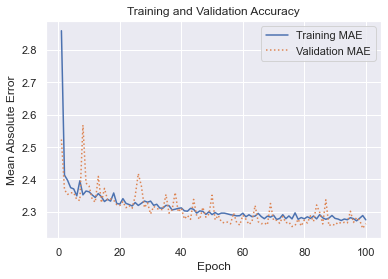

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

Get the coefficient of determination (R2) to determine how accurate the model is.

In [6]:
from sklearn.metrics import r2_score

r2_score(y, model.predict(x))

729/729 [==============================] - 1s 697us/step


0.7510869031297862

## Use the model to predict fare amounts

Finish up by using the trained model to make a pair of predictions. First, estimate what it will cost to hire a taxi for a 2-mile trip at 5:00 p.m. on Friday afternoon.

In [7]:
import numpy as np

model.predict(np.array([[4, 17, 2.0]]))

1/1 [==============================] - 0s 32ms/step


array([[10.62019]], dtype=float32)

Now predict the fare amount for a 2-mile trip taken at 5:00 p.m. one day later (on Saturday).

In [8]:
model.predict(np.array([[5, 17, 2.0]]))

1/1 [==============================] - 0s 12ms/step


array([[10.402352]], dtype=float32)